In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**20193176 김광제**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


 우선 어디에 결손값이 들어가있는지를 확인하기위함

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

나이대별로 bmi값을 주기 위해서 나이를 기준으로 그룹을 만듦

In [ ]:
age_group=[]
for i in df['age']:
    if i<2.0:
        age_group.append('Toddler')
    elif i>2.0 and i<=19.0:
        age_group.append('Teen')
    elif i>19.0 and i<60.0:
        age_group.append('Adult')
    else:
        age_group.append('Senior')
df['age_group']=age_group
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


평균 bmi를 체크 할 수 있도록 시각화 하였습니다.

In [ ]:
fig = px.box(df, x="age_group", y="bmi",color="gender")
fig.show()

In [ ]:
#나이에 따라 bmi의 결손값을 처리하는데 나이대와 성별로 평균 bmi를 넣어줌
def impute_bmi(cols):
    bmi = cols[0]
    age_group = cols[1]
    gender = cols[2]
    if pd.isnull(bmi):
        if age_group == 'Senior':
            if gender == 'Male':
                return 29.0
            else:
                return 28.9
        elif age_group == 'Adult':
            if gender == 'Male':
                return 30.2
            else:
                return 28.8
        elif age_group == 'Teen':
            if gender == 'Male':
                return 20.6
            else:
                return 21.8
        else:
            if gender == 'Male':
                return 18.9
            else:
                return 18.05
    else:
        return bmi
df['bmi']=df[['bmi','age_group','gender']].apply(impute_bmi,axis=1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [ ]:
df.isnull().sum() #다시 결손값 확인

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

In [ ]:
df.shape

(5110, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  age_group          5110 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 519.1+ KB


In [ ]:
df.rename(columns={"Residence_type": "residence_type"}, inplace=True) #Residence_type을 residence_type으로 수정

In [ ]:
cols = ['age','avg_glucose_level','bmi'] #구간 변수를 cols에 저장
df[cols].describe()                      #구간 변수의 요약통계 구하기

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.871027
std,22.612647,45.283560,7.718561
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.625000
50%,45.000000,91.885000,28.300000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


In [ ]:
df[cols].skew()

age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.071181
dtype: float64

In [ ]:
df[cols].kurtosis()

age                 -0.991010
avg_glucose_level    1.680479
bmi                  3.571591
dtype: float64

In [ ]:
df['work_type'].value_counts(dropna=False)

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
pd.crosstab(df['work_type'],columns='count')#개수기준

col_0,count
work_type,
Govt_job,657
Never_worked,22
Private,2925
Self-employed,819
children,687


In [ ]:
pd.crosstab(df['work_type'], columns='ratio',normalize=True)#비율기준

col_0,ratio
work_type,
Govt_job,0.128571
Never_worked,0.004305
Private,0.572407
Self-employed,0.160274
children,0.134442


In [ ]:
pd.crosstab(df['work_type'],df['stroke'],normalize=True)

stroke,0,1
work_type,,
Govt_job,0.122114,0.006458
Never_worked,0.004305,0.000000
Private,0.543249,0.029159
Self-employed,0.147554,0.012720
children,0.134051,0.000391


데이터에 중복된 행이 있으면 과적합 혹은 모델 편향을 있을 수 있다. 또한 데이터 집합의 품질을 저하시킬 수 있다.

In [ ]:
df.duplicated().sum()

0

데이터프레임의 특성을 분석하여 연속형과 범주형을 구분하기 위함 id와 stroke열은 제외시킨다. 그리고 con_cols배열에 들어간 age, avg_glucose_level, bmi는 이미 연속형 열로 분류된 열이기 때문에 제외시킴

In [ ]:
con_cols=['age','avg_glucose_level','bmi']
cat_cols=[]
for i in df.columns:
    if i!='id' and i!='stroke' and i not in con_cols:
        cat_cols.append(i)
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'residence_type',
 'smoking_status',
 'age_group']

데이터 확인

In [ ]:
cat_cols.append('age_group')
for i in cat_cols:
    print(f'============{i}============\n{df[i].value_counts()}\n------------------------')

============gender============
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
------------------------
============hypertension============
0    4612
1     498
Name: hypertension, dtype: int64
------------------------
============heart_disease============
0    4834
1     276
Name: heart_disease, dtype: int64
------------------------
============ever_married============
Yes    3353
No     1757
Name: ever_married, dtype: int64
------------------------
============work_type============
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
------------------------
============residence_type============
Urban    2596
Rural    2514
Name: residence_type, dtype: int64
------------------------
============smoking_status============
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
------------------------


위에서 확인한 결과에서 gender에 있는 Other를 가진 행은 삭제시킨다.

In [ ]:
df.drop(index = df[df['gender']=='Other'].index[0] ,axis=0,inplace=True)

범주형 열과 stroke열 간의 빈도수를 시각적으로 비교할 수 있으며 클래스별로 stroke열의 빈도수를 확인할 수 있다.

결과를 보았을때 나이대가 높을수록 뇌졸중일 확률이 높다.

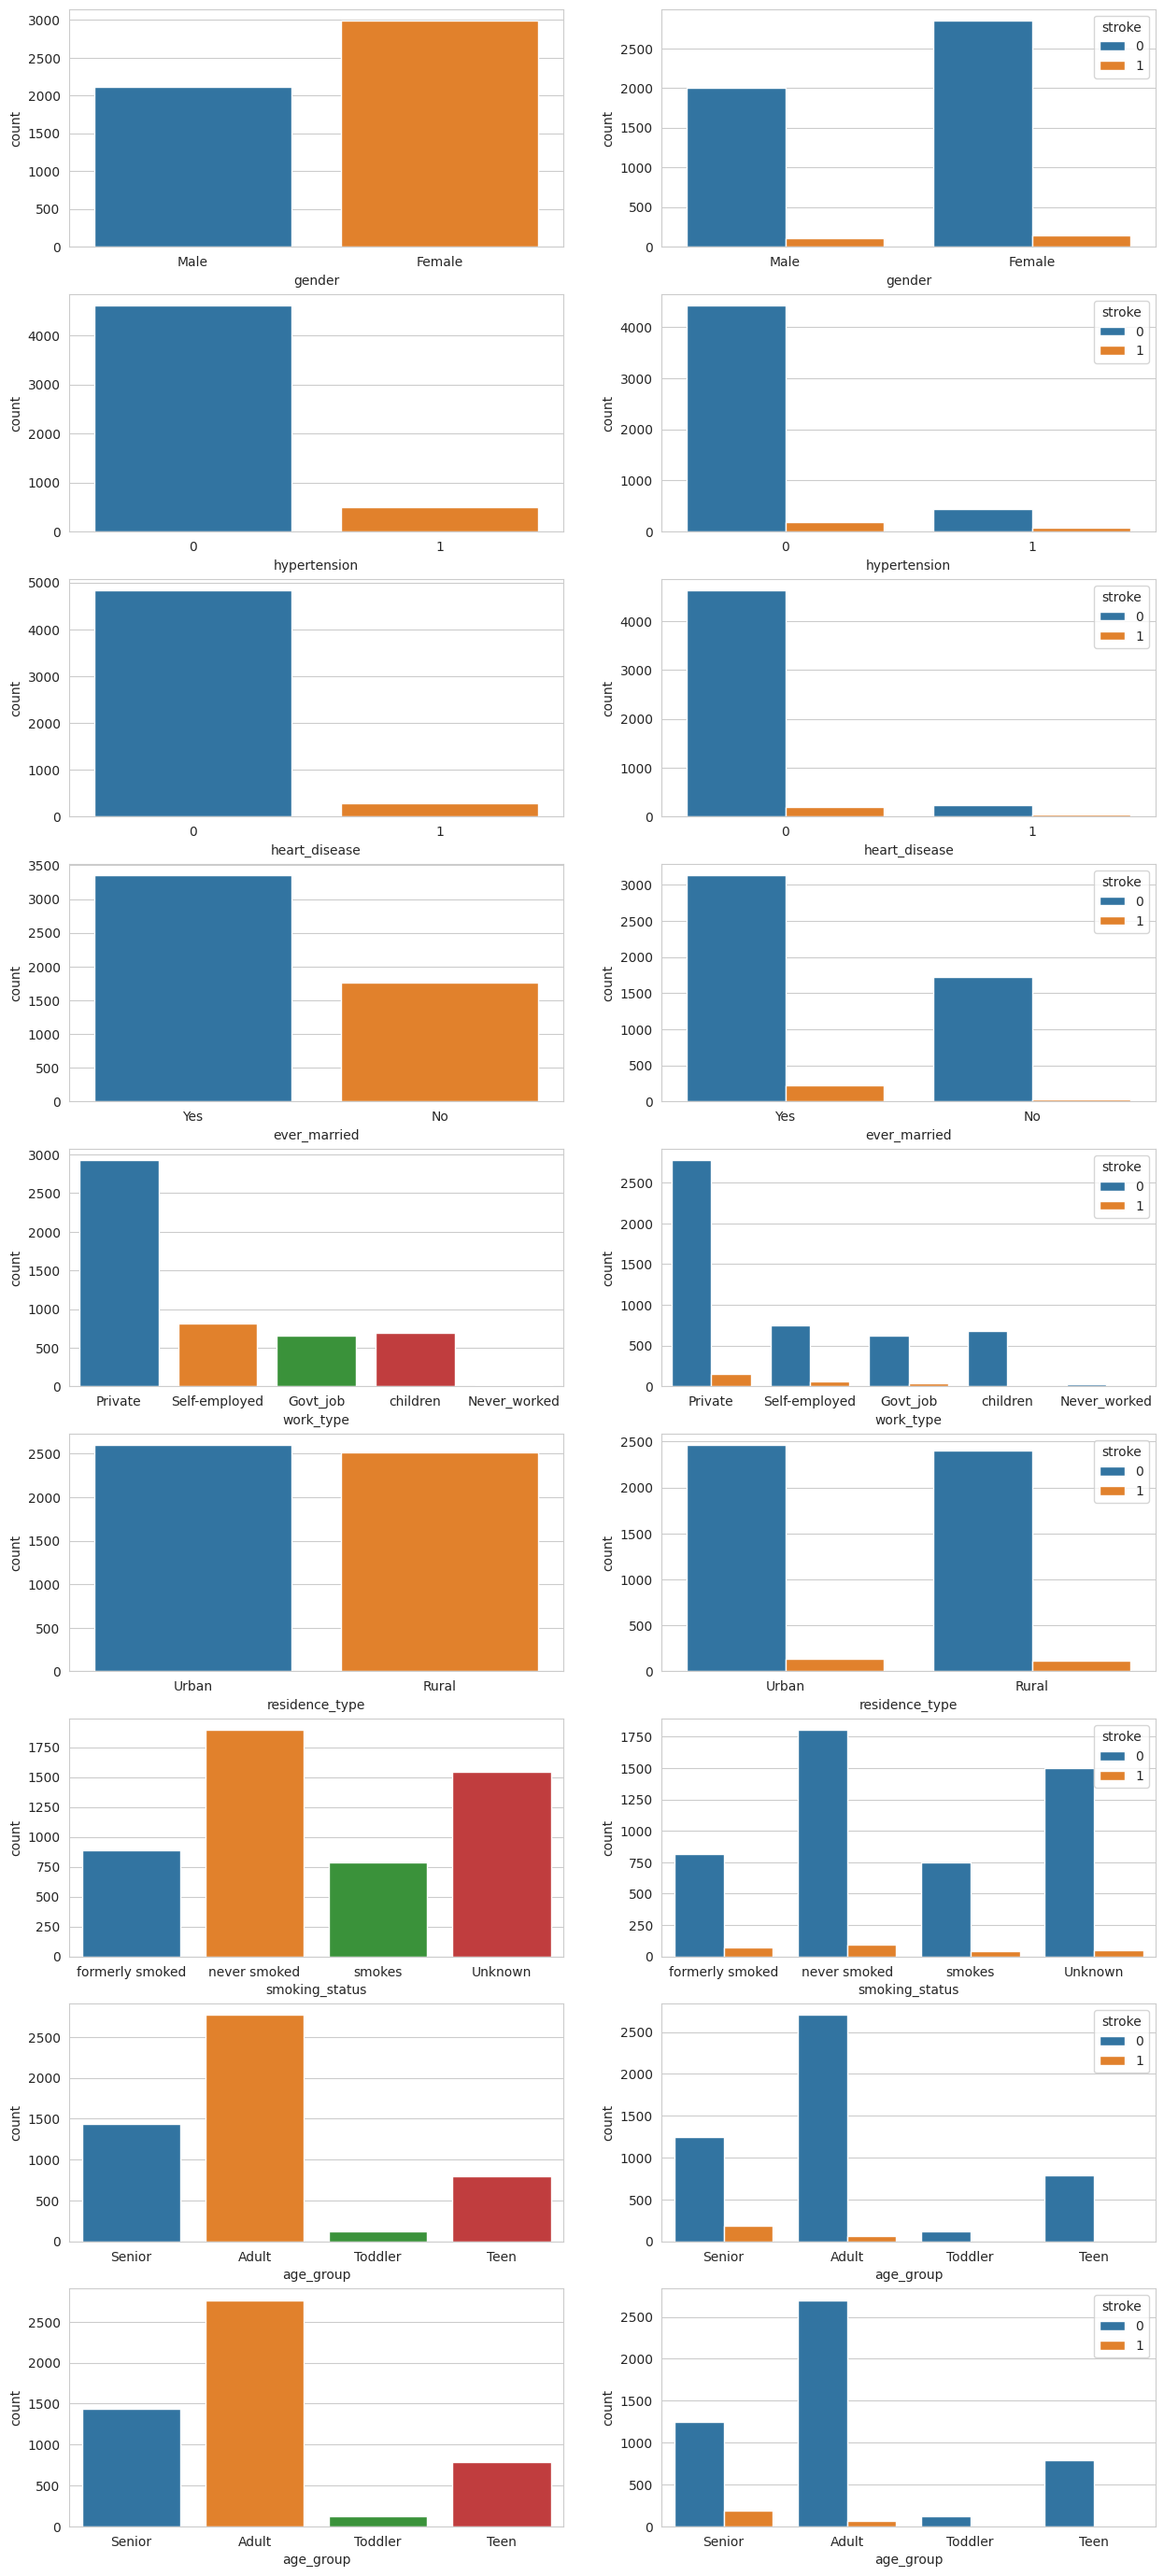

In [ ]:
fig, ax = plt.subplots(len(cat_cols), 2, figsize=(15, 35))
for index, i in enumerate(cat_cols):
    ax_row = index
    ax_col = 0  # 첫 번째 열
    sns.countplot(data=df, x=i, ax=ax[ax_row, ax_col])

    ax_col = 1  # 두 번째 열
    sns.countplot(data=df, x=i, ax=ax[ax_row, ax_col], hue='stroke')

**데이터 불균형**

 'stroke' 열의 클래스 분포를 시각적으로 파악할 수 있는 파이 차트이며 'Non Stroke'와 'Stroke' 클래스의 비율 확인 결과 데이터 불균형이 있음을 확인 가능


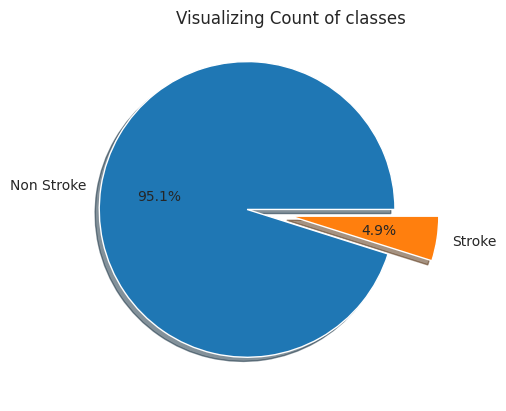

In [ ]:
plt.title("Visualizing Count of classes")
plt.pie(np.array(df['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0.3,0],autopct='%1.1f%%',shadow=True)
plt.show()

데이터 분포와 클래스 불균형을 시각화하고 이를 개선하기 위한 데이터 처리 단계를 판단하는 데 도움을 주는 시각화 정보입니다.

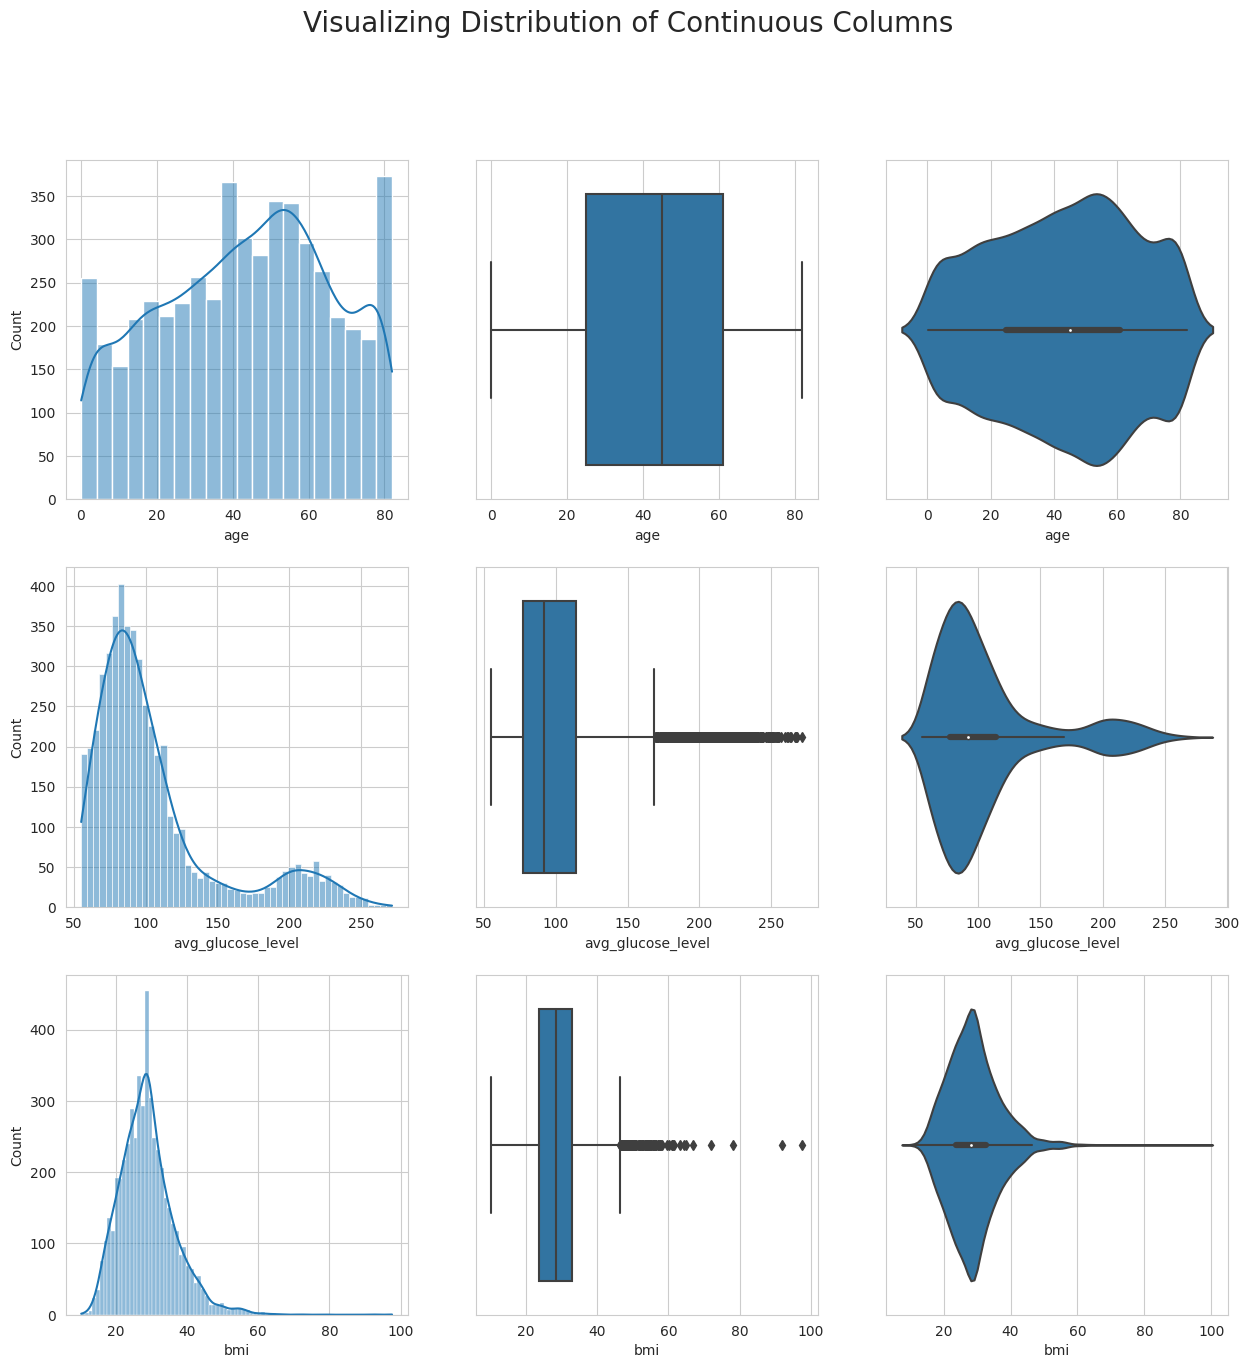

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
for index,i in enumerate(con_cols):
    plt.suptitle("Visualizing Distribution of Continuous Columns",size=20)
    sns.histplot(df[i],ax=ax[index,0],kde=True)
    sns.boxplot(data=df,x=i,ax=ax[index,1])
    sns.violinplot(data=df,x=i,ax=ax[index,2])

원-핫 인코딩을 사용하여 범주형 열을 더미 변수로 변환하는 작업


In [ ]:
cat_cols.pop()
df_enc=pd.get_dummies(df[cat_cols],drop_first=True)
df_enc.head()

,hypertension,heart_disease,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,0,1,1,1,0,1,0,0,1,1,0,0,1,0,0
1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0
3,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


데이터프레임 df에 범주형 열을 원-핫 인코딩된 열로 대체

In [ ]:
df[df_enc.columns]=df_enc
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,...,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,1,0,0,1,1,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,...,0,1,0,0,0,1,0,1,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,1,0,0,0,0,1,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,1,0,0,1,0,0,1,0,0,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
df.drop(cat_cols,axis=1,inplace=True)
df.head()

,id,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,9046,67.0,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0,1,0,0
1,51676,61.0,202.21,28.9,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0,1,0,0
3,60182,49.0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,1665,79.0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0


이전에 bmi 결손값 처리를 위해 만들어두었던 속성을 제거

In [ ]:
df_final=df.drop(['id','age_group_Senior','age_group_Teen','age_group_Toddler'],axis=1)
df_final.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,202.21,28.9,1,0,1,0,0,1,0,0,0,1,0
2,80.0,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0


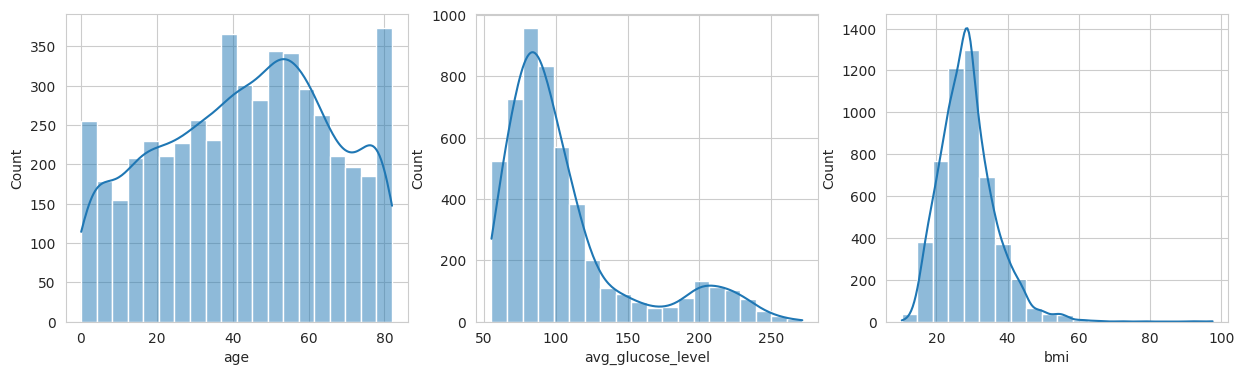

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,3,figsize=(15,4))

sns.histplot(ax=axes[0], data=df, x="age", kde=True, bins=20) #전체적으로 종모양
sns.histplot(ax=axes[1], data=df, x="avg_glucose_level", kde=True, bins=20)#봉오리가 2개 오른쪽이 이상값일 수 있음
sns.histplot(ax=axes[2], data=df, x="bmi", kde=True, bins=20)
plt.show()

이상값 발견

<Axes: xlabel='bmi'>

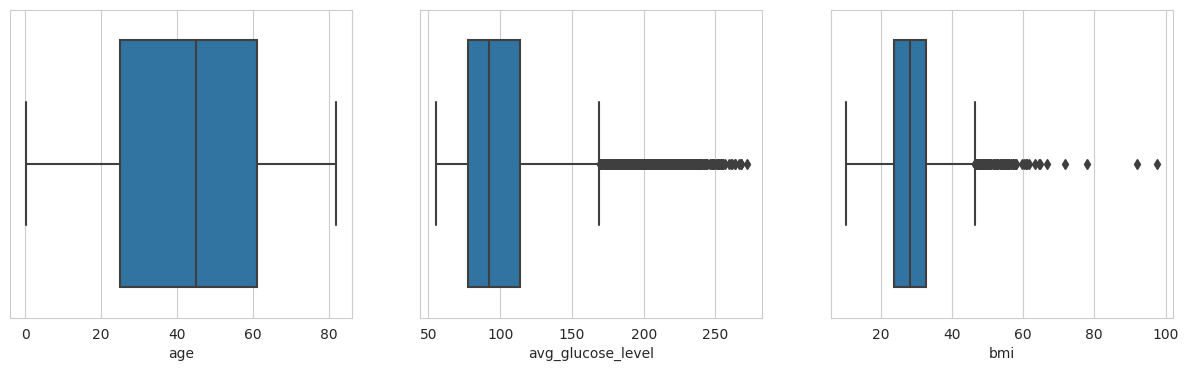

In [ ]:
sns.set_style("whitegrid")

fig ,axes = plt.subplots(1,3,figsize=(15,4))

sns.boxplot(ax=axes[0],x="age", data=df)
sns.boxplot(ax=axes[1],x="avg_glucose_level", data=df)
sns.boxplot(ax=axes[2],x="bmi", data=df)

이상치를 처리하기 위해 age값이 18세 미만인 어린 사람들을 제거하고 avg_glucose_level이 232.64이하이고 bmi가 60.3이하인 행들을 이상치 조건으로 정의하였다.

In [ ]:
df = df_final[df['age'] >= 18]

# 이후 IQR 및 이상치 처리를 수행
Q1 = df[['age', 'avg_glucose_level', 'bmi']].quantile(0.25)
Q3 = df[['age', 'avg_glucose_level', 'bmi']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Lower = Q1 - 3.0 * IQR
Upper = Q3 + 3.0 * IQR
print(Lower)
print(Upper)

c1 = df['avg_glucose_level'] <= 232.04
c2 = df['bmi'] <= 58.4

# 조건을 적용하여 데이터를 자름
df1 = df[c1 & c2]
df1.shape

age                  28.00
avg_glucose_level    38.64
bmi                   8.20
dtype: float64
age                 -48.00
avg_glucose_level   -38.44
bmi                   1.00
dtype: float64
age                  148.00
avg_glucose_level    232.04
bmi                   58.40
dtype: float64


(4139, 14)

<Axes: xlabel='bmi'>

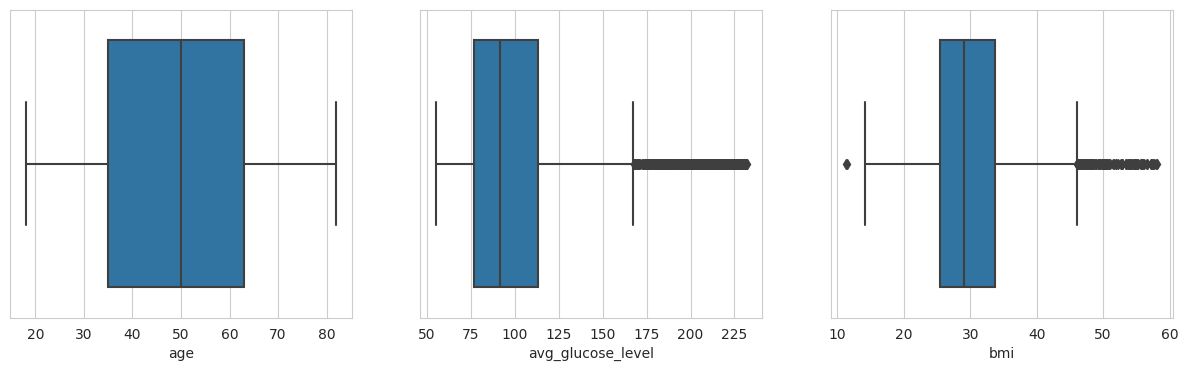

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,4))

sns.boxplot(ax=axes[0],x="age",data=df1)
sns.boxplot(ax=axes[1],x="avg_glucose_level",data=df1)
sns.boxplot(ax=axes[2],x="bmi",data=df1)

In [ ]:
df1.dtypes

age                               float64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Male                         uint8
ever_married_Yes                    uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
residence_type_Urban                uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

 **데이터들의 상관관계**

데이터의 상관관계를 시각적으로 표현한것이다 결과에서 확인할 수 있듯이 age와 avg_glucose_level이 가장 높은 상관관계를 가지는것을 확인할 수 있다.

In [ ]:
cols=['age','avg_glucose_level','bmi']
round(df1[cols].corr(),2)             #구간 변수간 상관계수 디스플레이

,age,avg_glucose_level,bmi
age,1.00,0.19,0.03
avg_glucose_level,0.19,1.00,0.15
bmi,0.03,0.15,1.00


<Axes: >

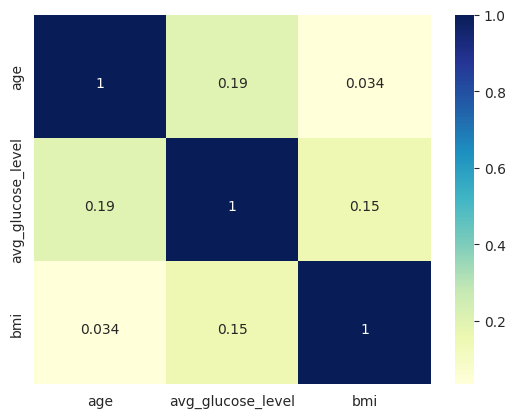

In [ ]:

import seaborn as sns
corr = df1[cols].corr()
annot_kws={"ha":"center","va":"top"}
sns.heatmap(data=corr,annot=True,annot_kws=annot_kws,cmap="YlGnBu")

나이가 많을수록 뇌졸중일 확률이 높음

<Axes: xlabel='age', ylabel='Count'>

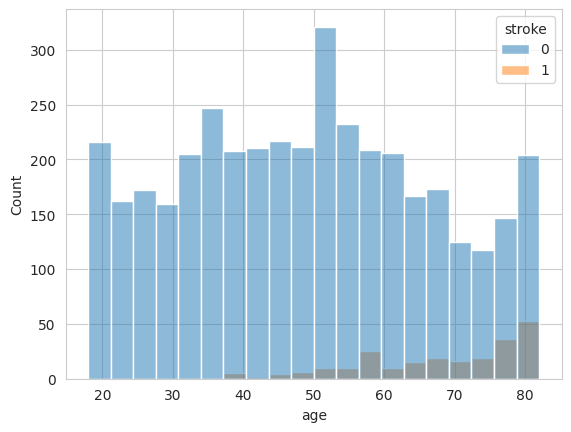

In [ ]:
import seaborn as sns
sns.histplot(data=df1,x="age",hue="stroke",bins=20)

<Axes: xlabel='stroke', ylabel='age'>

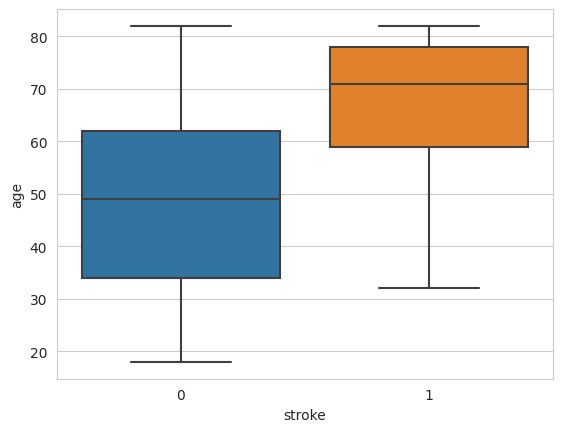

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x="stroke",y="age",data=df1)

<Axes: xlabel='bmi', ylabel='Count'>

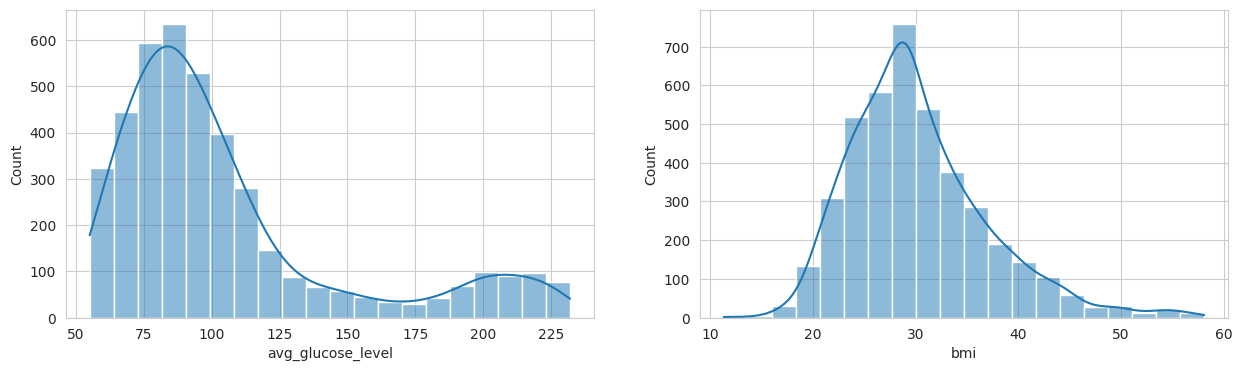

In [ ]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1,2,figsize=(15,4))

sns.histplot(ax=axes[0],data=df1,x="avg_glucose_level",kde = True, bins=20)
sns.histplot(ax=axes[1],data=df1,x="bmi",kde=True,bins=20)

<Axes: xlabel='bmi', ylabel='Count'>

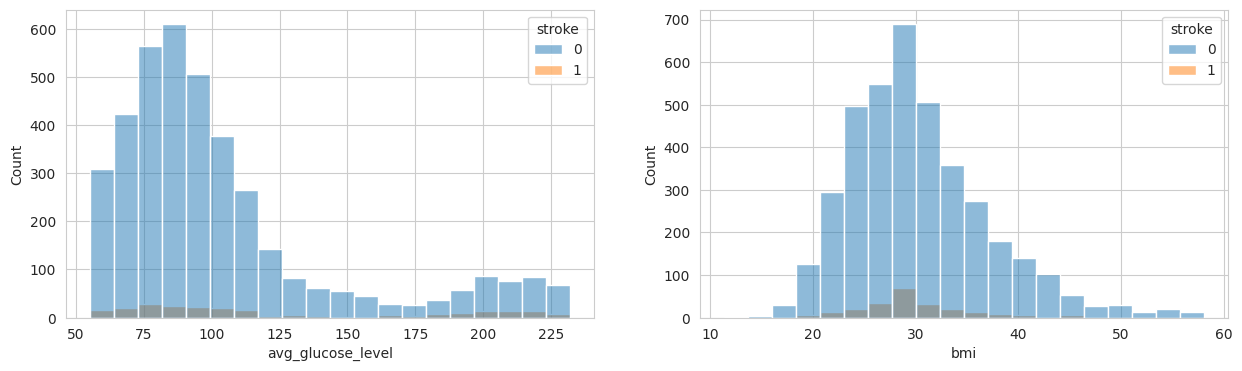

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(15,4))
sns.histplot(ax=axes[0],data=df1, x="avg_glucose_level",hue="stroke",bins=20)
sns.histplot(ax=axes[1],data=df1, x="bmi",hue="stroke",bins=20)

이걸 봤을때 나이와 평균 할당치가 체질량 지수보다는 뇌졸중에 영향이 큰것을 확인 가능하다

<Axes: xlabel='stroke', ylabel='bmi'>

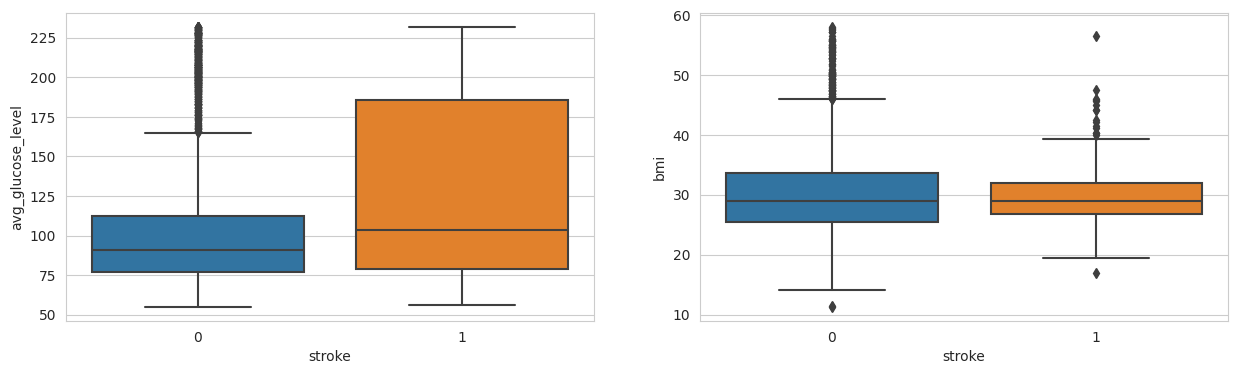

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(ax=axes[0],x="stroke",y="avg_glucose_level",data=df1)
sns.boxplot(ax=axes[1],x="stroke",y="bmi",data=df1)

소수 클래스의 오버샘플링

데이터 불균형 해결
소수 클래스(여기서는 'stroke'가 1인 클래스)의 수를 다수 클래스와 동일하게 맞춰주는 오버샘플링을 수행합니다. 이로써 클래스 간 균형을 맞출 수 있습니다.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=df1.drop(['stroke'],axis=1)
y=df1['stroke']
X_over, y_over = oversample.fit_resample(X, y)

훈련 세트와 테스트 세트로 분할

**검증데이터를 사용하지않고 교차검증을 통해 모델의 일반화 성능을 더 신뢰할 수 있는 방식으로 평가**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X_over,y_over,test_size=0.3,stratify=y_over,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 모델 생성
model = RandomForestClassifier()

# 모델 학습
model.fit(X_train, y_train)

# 예측
predictions = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy}')


정확도: 0.9872068230277186


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X_over,y_over,test_size=0.5,stratify=y_over,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 모델 생성
model = RandomForestClassifier()

# 모델 학습
model.fit(X_train, y_train)

# 예측
predictions = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy}')


정확도: 0.9695496417604913


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X_over,y_over,test_size=0.4,stratify=y_over,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 모델 생성
model = RandomForestClassifier()

# 모델 학습
model.fit(X_train, y_train)

# 예측
predictions = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy}')


정확도: 0.9840102334505916


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X_over,y_over,test_size=0.2,stratify=y_over,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 모델 생성
model = RandomForestClassifier()

# 모델 학습
model.fit(X_train, y_train)

# 예측
predictions = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy}')


정확도: 0.9910485933503836


1. KNN 모델:
    - 정확도(accuracy): 91%
    - 교차 검증 정확도: 90%
    - 평균 f1-score: 0.91
    - 교차 검증의 표준 편차: 0.02
2. SVM 모델:
    - 정확도(accuracy): 99%
    - 교차 검증 정확도: 81%
    - 평균 f1-score: 0.99
    - 교차 검증의 표준 편차: 0.02

3. 로지스틱 회귀 모델:
    - 정확도(accuracy): 75%
    - 교차 검증 정확도: 75%
    - 평균 f1-score: 0.75
    - 교차 검증의 표준 편차: 0.01
4. 로지스틱 회귀(표준화) 모델:
    - 정확도(accuracy): 74%
    - 교차 검증 정확도: 75%
    - 평균 f1-score: 0.74%
    - 교차 검증의 표준 편차: 0.02
5. 결정트리 모델:
    - 정확도(accuracy): 96%
    - 교차 검증 정확도: 96%
    - 평균 f1-score: 0.96
    - 교차 검증의 표준 편차: 0.01

Decision Tree 모델을 선택한 이유

1 . 해석 용이성

결정 트리는 각 분기에서의 결정 규칙이 명확하게 나타나기 때문에 모델이 어떻게 예측을 수행하는지 해석하기 쉽습니다. 의료 분야에서는 모델의 예측 근거를 이해하는 것이 중요할 수 있습니다.

2 . 안정성 및 일반화 능력

Decision Tree 모델은 교차 검증 결과의 표준 편차가 낮고 일관된 결과를 보이므로 안정성 면에서 우수합니다. 이는 모델이 일관된 예측을 제공하고 노이즈 데이터에 대해 민감하지 않다는 것을 의미합니다.

3 . 변수 중요도 제공

결정 트리는 각 특성의 중요도를 제공하여 어떤 특성이 예측에 영향을 주는지 판단할 수 있습니다. 특정 의료 지표가 중요한 역할을 하는 경우 이를 식별할 수 있습니다.


score 함수가 아닌 classification_report를 사용하여 테스트 데이터셋에 대한 성능 지표를 알 수 있다.

## 1. KNN 모델

1. KNN 모델:
    - 정확도(accuracy): 91%
    - 교차 검증 정확도: 90%
    - 평균 f1-score: 0.91
    - 교차 검증의 표준 편차: 0.02

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# 데이터 표준화
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# KNN 모델 생성
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_standardized, y_train)

# 모델 평가
print("Classification Report:")
print(classification_report(y_test, knn.predict(X_test_standardized)))

# 교차 검증 수행
scores = cross_val_score(knn, X_train_standardized, y_train, cv=5)  # 5-겹 교차 검증

# 교차 검증 확인용 0.01의 표준편차를 가짐
print("교차 검증 정확도: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1173
           1       0.84      1.00      0.92      1172

    accuracy                           0.91      2345
   macro avg       0.92      0.91      0.91      2345
weighted avg       0.92      0.91      0.91      2345

교차 검증 정확도: 0.89 (+/- 0.01)


# 2. SVM

2. SVM 모델:
    - 정확도(accuracy): 99%
    - 교차 검증 정확도: 81%
    - 평균 f1-score: 0.99
    - 교차 검증의 표준 편차: 0.01

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
print(classification_report(y_test,y_pred_svc))

from sklearn.model_selection import cross_val_score
svc = SVC()
# 교차 검증 수행
scores = cross_val_score(svc, X_train, y_train, cv=5)  # 5-겹 교차 검증 (cv=5)
# 교차 검증 결과 출력
print("교차 검증 정확도: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1173
           1       1.00      1.00      1.00      1172

    accuracy                           1.00      2345
   macro avg       1.00      1.00      1.00      2345
weighted avg       1.00      1.00      1.00      2345

교차 검증 정확도: 0.73 (+/- 0.03)


# 3. 로지스틱회귀

3. 로지스틱 회귀 모델:
    - 정확도(accuracy): 76%
    - 교차 검증 정확도: 75%
    - 평균 f1-score: 0.74%
    - 교차 검증의 표준 편차: 0.02


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l2'],
}
# RandomizedSearchCV 모델 생성
log = RandomizedSearchCV(LogisticRegression(solver='lbfgs'),
                         param_distributions=param_grid, cv=5, n_iter=10,
                         random_state=42)
log.fit(X_train, y_train)
# 교차 검증 정확도 출력
scores = cross_val_score(log.best_estimator_, X_train, y_train, cv=5)
print("교차 검증 정확도: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# 모델 평가
y_pred_log = log.predict(X_test)
print(classification_report(y_test, y_pred_log))

교차 검증 정확도: 0.76 (+/- 0.03)
              precision    recall  f1-score   support

           0       0.77      0.68      0.73      1173
           1       0.72      0.80      0.75      1172

    accuracy                           0.74      2345
   macro avg       0.74      0.74      0.74      2345
weighted avg       0.74      0.74      0.74      2345



# 4.로지스틱 회귀(표준화)

데이터의 일부 특성을 표준화하는 작업을 수행합니다. 특히, 'bmi', 'age', 그리고 'avg_glucose_level' 특성을 표준화하는데 사용됩니다. 표준화는 데이터의 평균을 0으로, 표준 편차를 1로 만들어 데이터를 정규 분포에 가깝게 만드는 작업입니다.

표준화의 장점은 모델 안정성과 모델 일반화 능력이 향상됩니다.

4. 로지스틱 회귀(표준화) 모델:
    - 정확도(accuracy): 74%
    - 교차 검증 정확도: 75%
    - 평균 f1-score: 0.74%
    - 교차 검증의 표준 편차: 0.02


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 데이터 표준화
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}
log = RandomizedSearchCV(LogisticRegression(solver='lbfgs'), param_distributions=param_grid, cv=5, n_iter=10, random_state=42)
log.fit(X_train_standardized, y_train)

# 교차 검증 정확도 출력
scores = cross_val_score(log.best_estimator_, X_train_standardized, y_train, cv=5)
print("교차 검증 정확도: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# 모델 평가
y_pred_log = log.predict(X_test_standardized)
print(classification_report(y_test, y_pred_log))


교차 검증 정확도: 0.76 (+/- 0.03)
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1173
           1       0.72      0.80      0.76      1172

    accuracy                           0.74      2345
   macro avg       0.75      0.74      0.74      2345
weighted avg       0.75      0.74      0.74      2345



# 5. 결정트리

5. 결정트리 모델:
    - 정확도(accuracy): 96%
    - 교차 검증 정확도: 96%
    - 평균 f1-score: 0.96%
    - 교차 검증의 표준 편차: 0.01
    


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Decision Tree 모델 생성
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# 교차 검증 수행
scores = cross_val_score(decision_tree, X_train, y_train, cv=5)
print("교차 검증 정확도: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# 모델 평가
y_pred_dt = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred_dt))


교차 검증 정확도: 0.97 (+/- 0.02)
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1173
           1       0.92      1.00      0.96      1172

    accuracy                           0.96      2345
   macro avg       0.96      0.96      0.96      2345
weighted avg       0.96      0.96      0.96      2345

